# Problem 3
12232509 Fan Qingyuan

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
# read lena image grayscale
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# Filter coefficients
lp_analysis = np.array([-1, 2, 6, 2, -1]) / 8
hp_analysis = np.array([-1, 2, -1]) / 2
lp_synthesis = np.array([1, 2, 1]) / 2
hp_synthesis = np.array([-1, -2, 6, -2, -1]) / 8

In [3]:
def pad_and_convolve_line(array, filter):
    # padding
    array = np.pad(array, (len(filter) // 2, len(filter) // 2), 'reflect')
    # convolution
    output = np.convolve(array, filter, mode='valid')
    return output

def pad_and_convolve_img(input_img, filter):
    input_conv_img = np.zeros(input_img.shape)
    width = input_img.shape[1]
    height = input_img.shape[0]
    for i in range(height):
        input_conv_img[i] = pad_and_convolve_line(input_img[i], filter)
    return input_conv_img

def decomposition(input_img):
    input_decomposition_img = np.zeros(input_img.shape)
    # decomposition
    hf = pad_and_convolve_img(input_img, hp_analysis)
    lf = pad_and_convolve_img(input_img, lp_analysis)
    input_decomposition_img[:,0:input_img.shape[1]//2] = lf[:,1::2]
    input_decomposition_img[:,input_img.shape[1]//2:input_img.shape[1]] = hf[:,::2]
    return input_decomposition_img

def reconstruction(input_img):
    # reconstruction
    hf = input_img[:,input_img.shape[1]//2:input_img.shape[1]]
    lf = input_img[:,0:input_img.shape[1]//2]
    hf_recon = np.zeros((input_img.shape[0], input_img.shape[1]))
    hf_recon[:,::2] = hf
    lf_recon = np.zeros((input_img.shape[0], input_img.shape[1]))
    lf_recon[:,1::2] = lf
    hf_recon = pad_and_convolve_img(hf_recon, hp_synthesis)
    lf_recon = pad_and_convolve_img(lf_recon, lp_synthesis)
    recon_img = hf_recon + lf_recon
    return recon_img

def decomposition_to_4(input_img):
    # decomposition
    L1 = decomposition(input_img)
    L2 = decomposition(L1.T).T
    return L2

def reconstruction_from_4(input_img):
    # reconstruction
    L1 = reconstruction(input_img.T).T
    L2 = reconstruction(L1)
    return L2

In [4]:
def decomposition_to_specify_level(input_img, level):
    L = input_img
    for i in range(level):
        L = decomposition_to_4(L)
    return L

def reconstruction_from_specify_level(input_img, level):
    L = input_img
    for i in range(level):
        L = reconstruction_from_4(L)
    return L

## L1 decomposition

In [5]:
l1_decomp = decomposition_to_4(img)
l1_recon = reconstruction_from_4(l1_decomp)

In [6]:
# mse
mse = np.sum((img - l1_recon)**2) / (img.shape[0] * img.shape[1])
print('MSE: ', mse)

MSE:  0.0


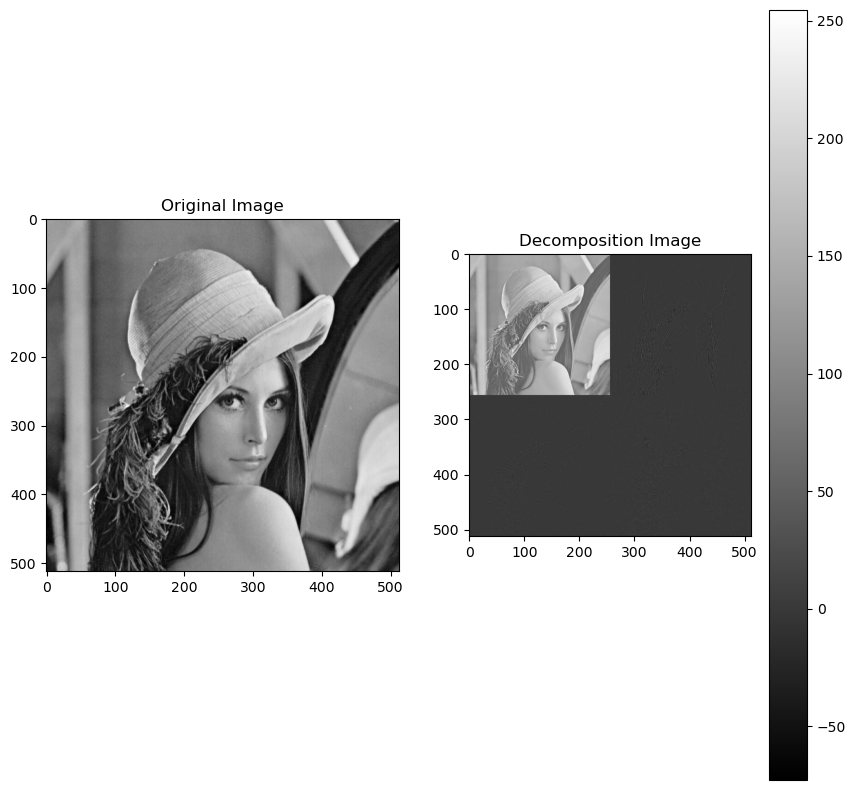

In [7]:
# plot img and l1_decomp
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(l1_decomp, cmap='gray')
plt.colorbar()
plt.title('Decomposition Image')
plt.show()

## Do subband decomposition for 5 times (till the width of the block is 16)

In [8]:
l5_decomp = decomposition_to_specify_level(img, 5)
l5_recon = reconstruction_from_specify_level(l5_decomp, 5)

In [9]:
# calculate mse
mse = np.sum((img - l5_recon)**2) / (img.shape[0] * img.shape[1])
print('MSE: ', mse)

MSE:  0.0


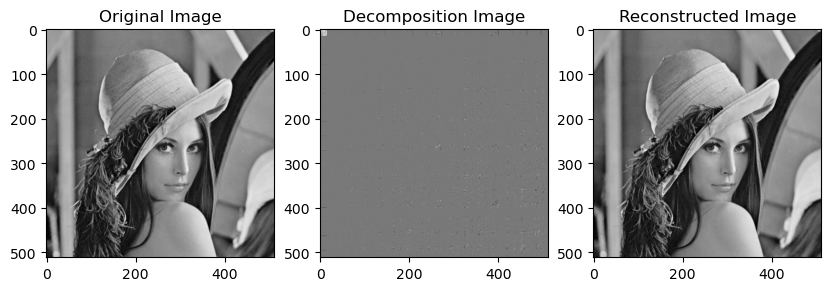

In [10]:
# plot img and l1_decomp
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(l5_decomp, cmap='gray')
plt.title('Decomposition Image')
plt.subplot(1,3,3)
plt.imshow(l5_recon, cmap='gray')
plt.title('Reconstructed Image')
plt.show()